# Import software libraries and load the dataset

In [1]:
import sys                             # Read system parameters.
import shutil
import numpy as np                     # Work with multi-dimensional arrays and matrices.
from numpy.random import seed
import matplotlib as mpl               # Create 2D charts.
import matplotlib.pyplot as plt
import sklearn                         # Perform data mining and analysis.
import tensorflow                      # Train neural networks for deep learning.
import keras                           # Provide a frontend for TensorFlow.
from keras import datasets

# Summarize software libraries used.
print('Libraries used in this project:')
print('- Python {}'.format(sys.version))
print('- NumPy {}'.format(np.__version__))
print('- Matplotlib {}'.format(mpl.__version__))
print('- scikit-learn {}'.format(sklearn.__version__))
print('- TensorFlow {}'.format(tensorflow.__version__))
print('- Keras {}\n'.format(keras.__version__))

# Load the dataset.
shutil.rmtree('/home/jovyan/.keras')
shutil.copytree('/home/jovyan/work/.keras', '/home/jovyan/.keras')
(X_train, y_train), (X_test, y_test) = datasets.imdb.load_data(num_words = 10000)
print('Loaded {} training records.'.format(len(X_train.data)))
print('Loaded {} test records.'.format(len(X_test.data)))

# Uncomment the following two lines to make outcomes deterministic. Supply whatever seed values you wish.
#seed(1)
#tensorflow.random.set_seed(1)

Using TensorFlow backend.


Libraries used in this project:
- Python 3.7.6 | packaged by conda-forge | (default, Mar 23 2020, 23:03:20) 
[GCC 7.3.0]
- NumPy 1.16.2
- Matplotlib 3.0.3
- scikit-learn 0.20.3
- TensorFlow 2.0.0
- Keras 2.3.1

Loaded 25000 training records.
Loaded 25000 test records.


# Get acquainted with the dataset

In [2]:
print('First example features:\n')
print(X_train[0])
print('\n')
print('Label: {}'.format(y_train[0]))

First example features:

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


Label: 1


In [3]:
# Decode sequence values into actual text.
index = datasets.imdb.get_word_index()
index_dict = dict([(value, key) for (key, value) in index.items()])
decode = ' '.join([index_dict.get(i - 3, '?') for i in X_train[0]])  # Replace unknown words with '?'.
print(decode) 

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

# Examine some statistics about the reviews

In [4]:
result = [len(i) for i in X_train]
print('Mean review length (in words): {:.0f}'.format(np.mean(result)))
print('Standard deviation (in words): {:.0f}'.format(np.std(result)))

Mean review length (in words): 239
Standard deviation (in words): 176


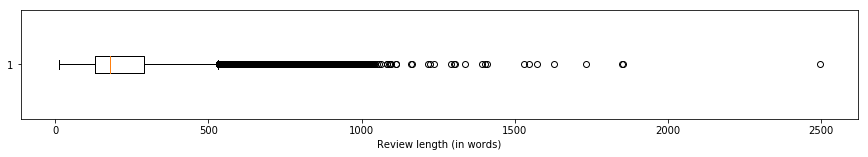

In [5]:
plt.figure(figsize = (15, 2))
plt.boxplot(result, vert = False)
plt.xlabel('Review length (in words)')
plt.show()

# Add padding to the data

In [6]:
from keras.preprocessing import sequence

X_train = sequence.pad_sequences(X_train, maxlen = 500)
X_test = sequence.pad_sequences(X_test, maxlen = 500)

print('Number of features: {}'.format(X_train.shape[1]))

Number of features: 500


# Split the datasets

In [7]:
from sklearn.model_selection import train_test_split

# Split the training and validation datasets and their labels.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state = 50)

print(f'Training features:         {X_train.shape}')
print(f'Validation features:       {X_val.shape}')
print(f'Training labels:           {y_train.shape}')
print(f'Validation labels:         {y_val.shape}')

Training features:         (18750, 500)
Validation features:       (6250, 500)
Training labels:           (18750,)
Validation labels:         (6250,)


# Build the RNN structure

In [8]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.layers.advanced_activations import LeakyReLU

rnn = Sequential()

# Start stacking layers one-by-one.
rnn.add(Embedding(input_dim = 10000,  # Size of vocabulary (top 10,000 words).
                  output_dim = 100,  # 100-dimensional vector embedding.
                  input_length = 500))  # Length of review (in words).

rnn.add(LSTM(units = 64))  # 64-dimensional LSTM.
rnn.add(LeakyReLU(alpha = 0.1))

rnn.add(Dense(128, activation = 'linear'))
rnn.add(LeakyReLU(alpha = 0.1))
rnn.add(Dense(1, activation = 'sigmoid'))  # Dense output layer with sigmoid activation.

print('The RNN structure has been built.')

The RNN structure has been built.


# Compile the model and examine the layers

In [9]:
rnn.compile(optimizer = 'adam',
            loss = 'binary_crossentropy',
            metrics = ['accuracy'])

rnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 100)          1000000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                42240     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 1,050,689
Trainable params: 1,050,689
Non-trainable params: 0
____________________________________________

In [10]:
# Install the required library.
!conda install --yes graphviz==2.40.1

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.



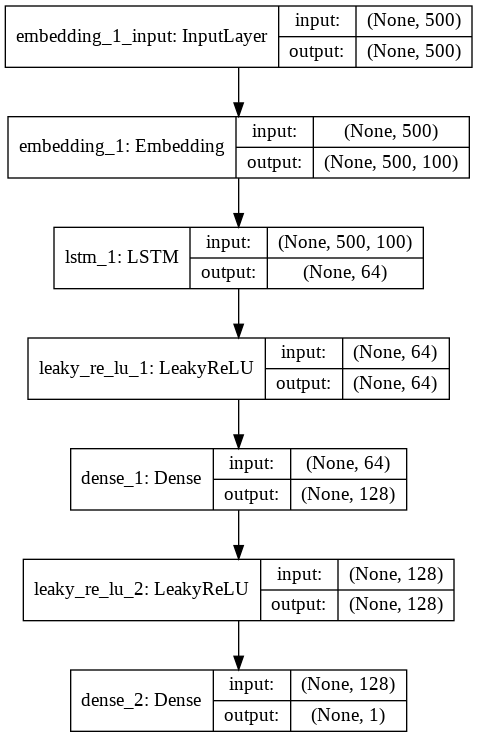

In [11]:
from keras.utils import plot_model
plot_model(rnn, show_shapes = True, to_file = 'model2.png')

# Train the model

In [12]:
rnn_trained = rnn.fit(X_train, y_train,
                      validation_data = (X_val, y_val),
                      epochs = 1,
                      verbose = 1)

Train on 18750 samples, validate on 6250 samples
Epoch 1/1
18750/18750 [==============================] - 274s 15ms/step - loss: 0.4388 - accuracy: 0.7887 - val_loss: 0.3730 - val_accuracy: 0.8506


# Evaluate the model on the test data

In [13]:
eval_test = rnn.evaluate(X_test, y_test, verbose = 0)

print('Loss: {}'.format(round(eval_test[0], 2)))
print('Accuracy: {:.0f}%'.format(eval_test[1] * 100))

Loss: 0.38
Accuracy: 84%


# Make predictions on the test data

In [14]:
prediction = rnn.predict(X_test[:100])  # Predict first 100 examples to save time.
prediction = np.round(np.ndarray.flatten(prediction))  # Round probabilities to 0 or 1.
prediction = prediction.astype(int)

print('Actual class:    {}'.format(y_test[:10]))
print('Predicted class: {}'.format(prediction[:10]))

Actual class:    [0 1 1 0 1 1 1 0 0 1]
Predicted class: [1 1 0 1 1 1 0 0 1 1]


# Examine a review that was correctly classified

In [15]:
label_names = ['negative', 'positive']

for i in range(100):
    if y_test[i] == prediction[i]:
        print('Actual review sentiment:    {}'.format(label_names[y_test[i]]))
        print('Predicted review sentiment: {}\n'.format(label_names[prediction[i]]))
        
        decode = ' '.join([index_dict.get(x - 3, '?') for x in X_test[i]])
        
        print(decode)
        
        break

Actual review sentiment:    positive
Predicted review sentiment: positive

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? this film requires a lot of patience because it focuses on mood and character development the plot is very simple and many of the scenes take place on the same set in frances ? the sandy dennis character apartment but the film builds to a disturbing climax br br the characters create an atmosphere ? with sexual tension and psychological ? it's very interesting that robert altman directed this considering the style and structure of his othe

# Examine a review that was incorrectly classified

In [16]:
for i in range(100):
    if y_test[i] != prediction[i]:
        print('Actual review sentiment:    {}'.format(label_names[y_test[i]]))
        print('Predicted review sentiment: {}\n'.format(label_names[prediction[i]]))
        
        decode = ' '.join([index_dict.get(x - 3, '?') for x in X_test[i]])
        
        print(decode)
        
        break

Actual review sentiment:    negative
Predicted review sentiment: positive

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? please give this one a miss br br ? ? and the rest of the c